# Caelan Osman
## Math 436, Sec 2
## Wed Sep., 15
## Homework 3.1

### Exercise 3.1

In [39]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [40]:
def euler_1st_ode(func, deltaT, finalT, ini_val):
    '''This function uses forward Euler's method to numerically solve a 
    first order autonomous differential equation x' = f(x).
    
    Parameters:
    func (function): RHS in x' = f(x)
    deltaT (float): time step size
    finalT (float): time to stop at
    ini_val (float): initial value of function
    
    Returns:
    t_vals (np.ndarray): array containing time step values
    x (np.ndarray): array containing solution x(t).
    '''
    
    t_vals = np.linspace(0, finalT, int(np.floor(finalT/deltaT)) + 1)
    x = np.zeros_like(t_vals)
    x[0] = ini_val
    for i in range(1, len(t_vals)):
        x[i] = x[i-1] + deltaT * func(x[i-1])
        
    return t_vals, x    

### Exercise 3.2

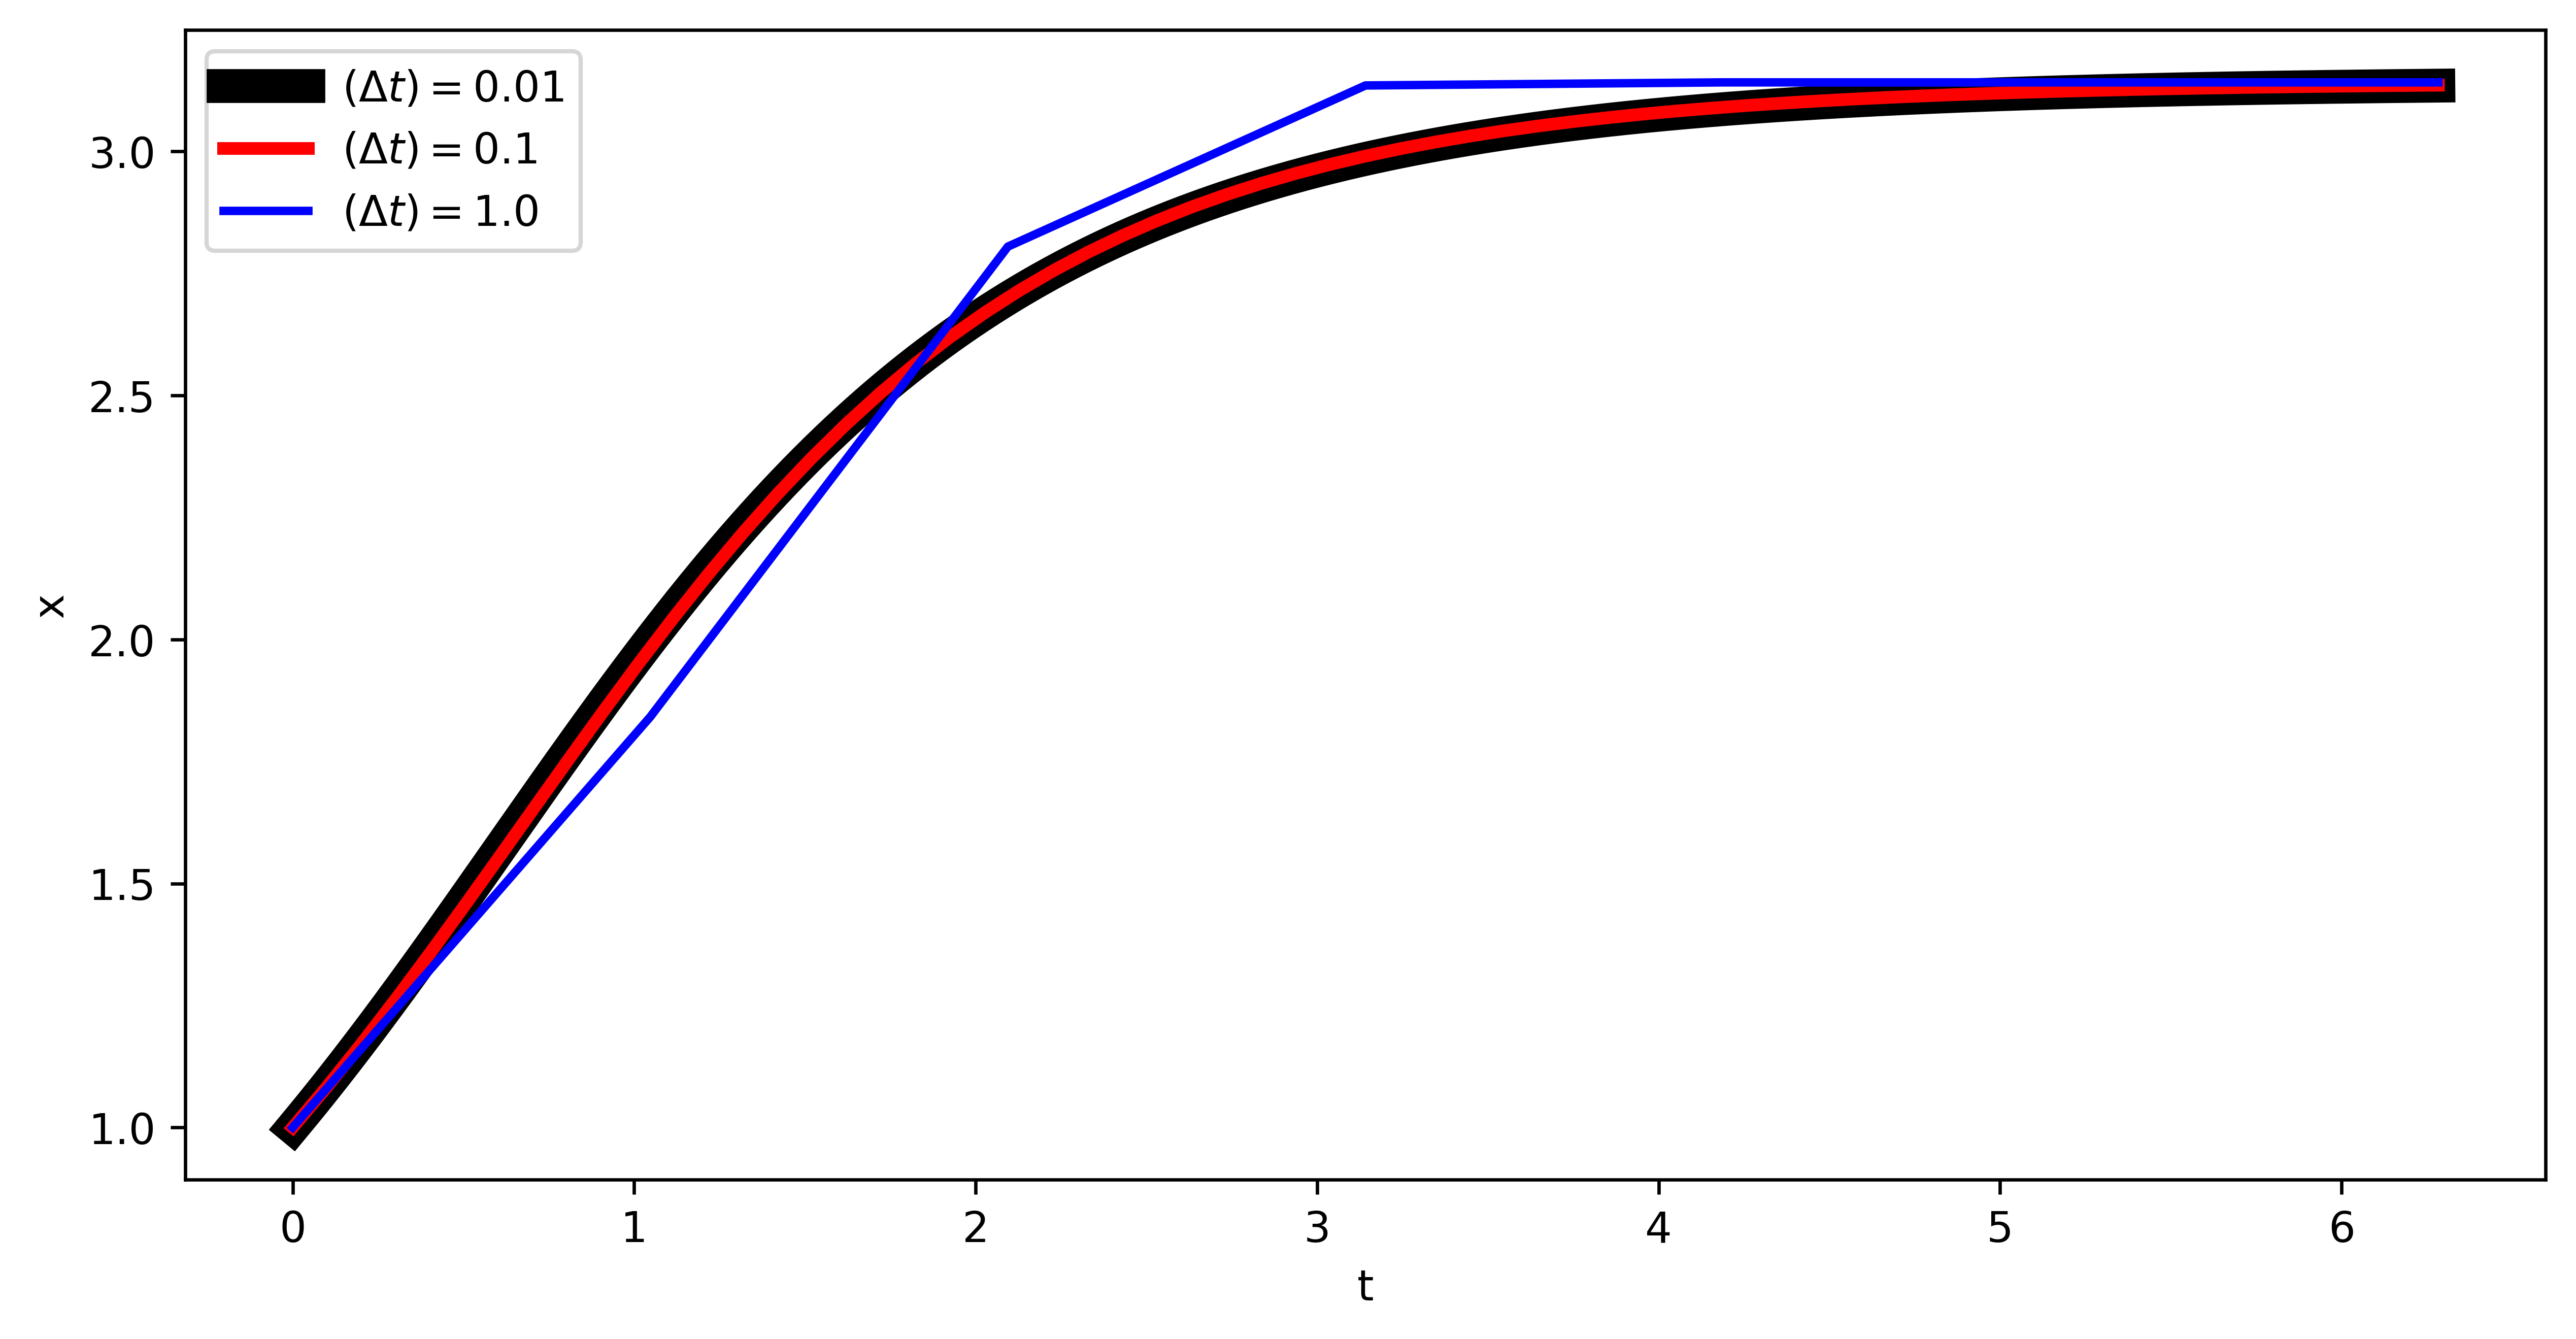

In [50]:
f = lambda x: np.sin(x)

deltaT = np.array([0.01, 0.1, 1])
colors = np.array(['k-', 'r-', 'b-'])
lw = np.array([8, 3, 2])
finalT = 2*np.pi
ini_val = 1

fig = plt.figure()
fig.set_dpi(600)
ax = fig.add_subplot(111)
for i, delta in enumerate(deltaT):
    t, x = euler_1st_ode(f, delta, finalT, ini_val)
    ax.plot(t, x, colors[i], lw=lw[i], label= r'$(\Delta t) = $' + str(delta))
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    plt.legend(loc='best')
plt.show()

### Exercise 3.4

In [42]:
def euler_1st_ode_backward(a, b, deltaT, finalT, ini_val):
    '''This function uses forward Euler's method to numerically solve a 
    first order autonomous differential equation x' = f(x).
    
    Parameters:
    func (function): RHS in x' = f(x)
    deltaT (float): time step size
    finalT (float): time to stop at
    ini_val (float): initial value of function
    
    Returns:
    t_vals (np.ndarray): array containing time step values
    x (np.ndarray): array containing solution x(t).
    '''
    
    t_vals = np.linspace(0, finalT, int(np.floor(finalT/deltaT)) + 1)
    x = np.zeros_like(t_vals)
    x[0] = ini_val
    for i in range(1, len(t_vals)):
        x[i] = (x[i-1] + deltaT * b) / (1 + deltaT * a)
        
    return t_vals, x

### Exercise 3.5

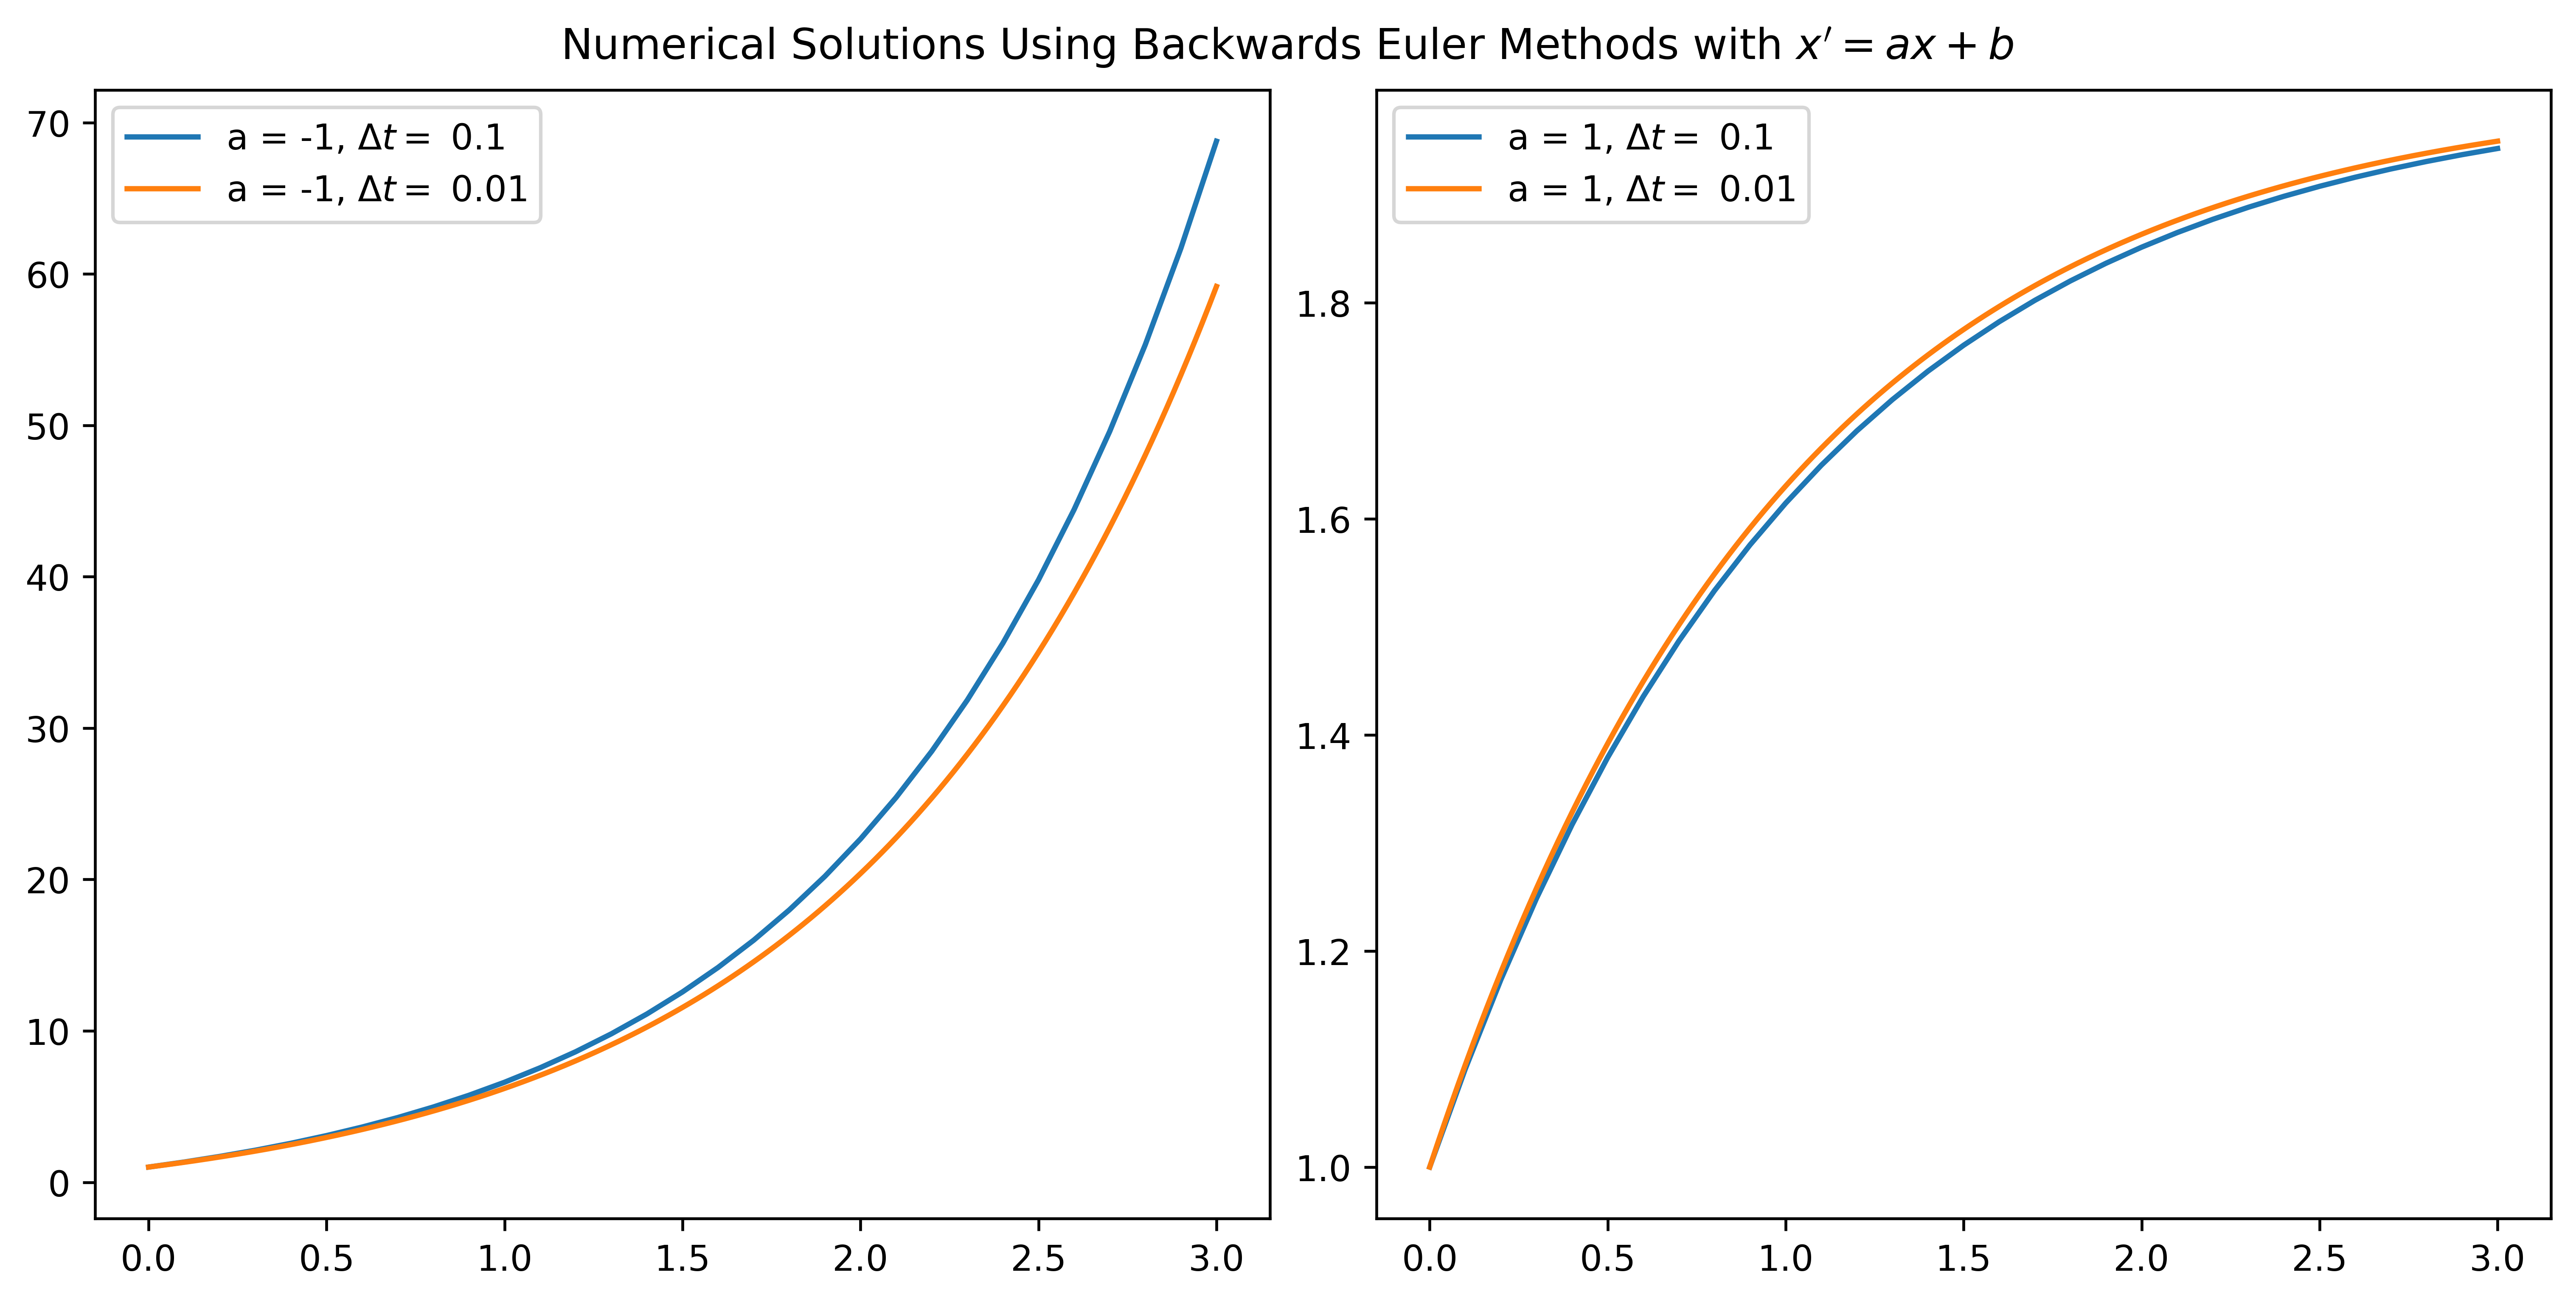

In [51]:
a_arr = np.array([-1, 1])
b = 2
deltaT = np.array([0.1, 0.01])
finalT = 3
ini_val = 1

fig, axs = plt.subplots(1, 2, constrained_layout=True)
fig.set_dpi(600)


for a in a_arr:
    for delta in deltaT:
        t, x = euler_1st_ode_backward(a, b, delta, finalT, ini_val)
        if a == a_arr[0]:
            ax = axs[0]
            ax.plot(t, x, label= 'a = ' + str(a) + r', $\Delta t =$ ' + str(delta))
            ax.legend(loc='best')
        else:
            ax = axs[-1]
            ax.plot(t, x, label = 'a = ' + str(a) + r', $\Delta t =$ ' + str(delta))
            ax.legend(loc='best')
plt.suptitle(r"Numerical Solutions Using Backwards Euler Methods with $x'=ax + b$ ")
plt.show()


